### Using Mac GPU

In [2]:
import torch

if torch.backends.mps.is_available():
    mps_device = torch.device('mps')
    x = torch.ones(1, device= mps_device)
    print(x)
else:
    print('no mps')

tensor([1.], device='mps:0')


In [3]:
import time

# GPU
start_time = time.time()

# syncrocnize time with cpu, otherwise only time for of laoding data to gpu would be measured
torch.mps.synchronize()

a = torch.ones(4000,4000, device="mps")
for _ in range(200):
   a +=a

elapsed_time = time.time() - start_time
print( "GPU Time: ", elapsed_time)

GPU Time:  0.29004430770874023


In [4]:
# CPU
start_time = time.time()


a = torch.ones(4000,4000)
for _ in range(200):
   a +=a

elapsed_time = time.time() - start_time
print( "CPU Time: ", elapsed_time)

CPU Time:  0.3262639045715332


In [ ]:
# How to use the GPU
device = torch.device('mps')

### Celsius to fahrenheit

In [41]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Create NumPy arrays containing temperature values in Celsius and Fahrenheit
# These are the input (features) and output (labels) for training
celsius_q = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit_a = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

# Loop through the Celsius array and print each value paired with its Fahrenheit equivalent
# Just to visually confirm the data being used
for i, c in enumerate(celsius_q):
    print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))

# Convert NumPy arrays to PyTorch tensors
# The .unsqueeze(1) reshapes the data from shape [7] to [7, 1] to match model input expectations
celsius_tensor = torch.tensor(celsius_q, dtype=torch.float).unsqueeze(1)  # shape: (7, 1)
fahrenheit_tensor = torch.tensor(fahrenheit_a, dtype=torch.float).unsqueeze(1)  # shape: (7, 1)


-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit


In [36]:
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {device}")

Using device: mps


In [50]:
# Define the model
class LinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1) # features = 1 & Output = 1
    def forward(self, x):
        return self.linear(x)


In [68]:
# Gathering the training tools for the model
model = LinearModel()
criterion = nn.MSELoss() # Tells the machine how bad a guess is by comparing it to the actual answer
optimizer = torch.optim.SGD(model.parameters(), lr=0.001) # Tells the machine how much to alter its parameters in order to get values closer to the actual answer


In [69]:
# Training the model
epochs = 500 # 500 practice rounds
losses = [] # Initialize a empty list to store loss values
for epoch in range(epochs):
    model.train()

    guess = model(celsius_tensor)
    loss = criterion(guess, fahrenheit_tensor)
    losses.append(loss.item())

    optimizer.zero_grad() # clears away the old errors
    loss.backward() # figures out how to improve the parameters
    optimizer.step() #Updates the internal parameters so that the model gets better at making predictions

    if (epoch + 1) % 50 == 0:
        print(f'Epoch {epoch + 1} out of {epochs}, loss = {loss.item():.4f}')

Epoch 50 out of 500, loss = 816.6725
Epoch 100 out of 500, loss = 673.8631
Epoch 150 out of 500, loss = 556.0282
Epoch 200 out of 500, loss = 458.8003
Epoch 250 out of 500, loss = 378.5759
Epoch 300 out of 500, loss = 312.3812
Epoch 350 out of 500, loss = 257.7626
Epoch 400 out of 500, loss = 212.6959
Epoch 450 out of 500, loss = 175.5103
Epoch 500 out of 500, loss = 144.8279


In [70]:
# Using the trained model
model.eval() # Tells the model its time to make some predictions
test_output = torch.tensor([[100]], dtype=torch.float32)
pred = model(test_output)
print(f'{test_output.item()} Celsius = {pred.item():.0f} Fahrenheit')

100.0 Celsius = 210 Fahrenheit


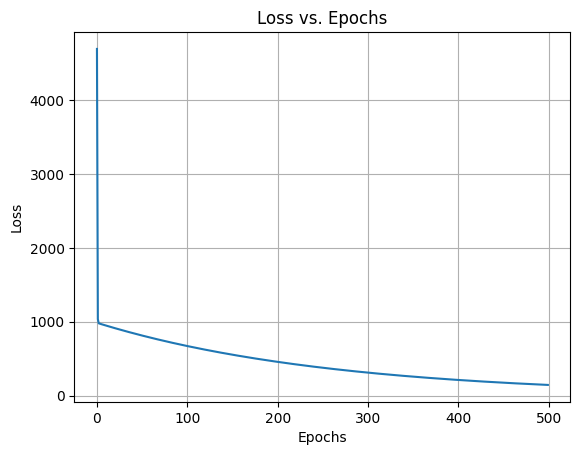

In [78]:
# Display training statistics
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.grid(True)
plt.show()

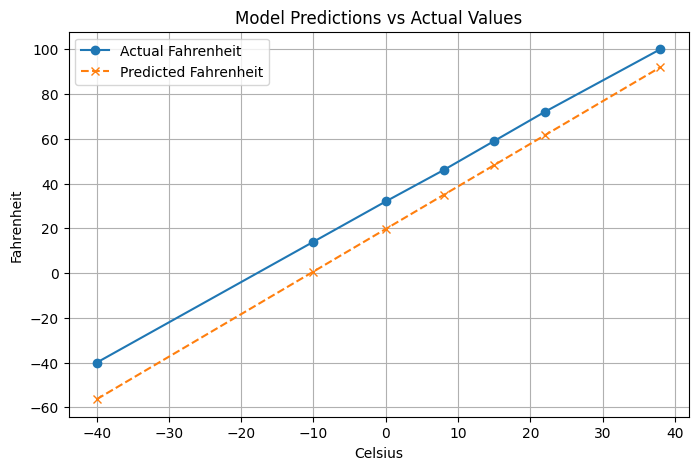

In [79]:
#Comparing prediction and actual values

model.eval() # Tells the model its time to make some predictions

# Run predictions on the full training set
# Turn off gradient computing since we are not training anymore
with torch.no_grad():
    predictions = model(celsius_tensor).squeeze()  # flatten predictions for plotting

# Convert tensors to NumPy for plotting
true_values = fahrenheit_tensor.squeeze().numpy()
predicted_values = predictions.numpy()
celsius_values = celsius_tensor.squeeze().numpy()

# Plot actual vs predicted
plt.figure(figsize=(8, 5))
plt.plot(celsius_values, true_values, 'o-', label='Actual Fahrenheit')
plt.plot(celsius_values, predicted_values, 'x--', label='Predicted Fahrenheit')
plt.xlabel('Celsius')
plt.ylabel('Fahrenheit')
plt.title('Model Predictions vs Actual Values')
plt.legend()
plt.grid(True)
plt.show()


### Fashion MNIST